In [1]:
import json
import re
from datetime import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
with open('../linux-commits-2023-11-12.json') as f:
    all_commits = f.readlines()

In [4]:
all_commits_dict_list = []
all_commits_map = {}
for commit in all_commits:
    commit_dict = json.loads(commit)

    # Just a fair idea about multiple-key
    for n in [5, 6, 7, 8, 9, 10, 11, 12]:
        # To cover collisions
        if commit_dict['data']['commit'][0:n] in all_commits_map:
            all_commits_map[commit_dict['data']['commit'][0:n]].append(commit_dict)
        else:
            all_commits_map[commit_dict['data']['commit'][0:n]] = [commit_dict]
    all_commits_dict_list.append(commit_dict)

- Commits por año a lo largo del tiempo
  - Committers por año a lo largo del tiempo
  - Tamaño de los commits por año, a lo largo del tiempo. Para el
tamaño, usamos simplemente el tamaño del diff, que tenemos sus datos en
lo de Perceval. Para cada año, podemos usar cuatro cuartiles, aunque
quizás sea difícil representarlos en una gráfica porque va a haber
muchos commits muy pequeños (pero podemos probar). Añadir mención
  - Lo mismo, para número de ficheros tocados por el commit, a lo largo
del tiempo.

Las dos útlimas son para ver un poco si ha habido cambios destacables a
lo largo del tiempo.

También una tabla de estadísticas con número de commits, número de
committers, fecha de primer commit, fecha de último commit, y no sé si
algo más, apra caracterizar la muestra.

Cuanto tiempo ha estado abierto un bug (BIC-BFC) 
- Gráfica por cada año con colores distintos

Nº caracteres del comentario

Nº de gente que está introduciendo bugs a lo largo del tiempo (cuánta gente son responsables de los BICs?)

Nº de gente involucrada

In [36]:
all_commits_dict_list[-100]

{'backend_name': 'Git',
 'backend_version': '0.13.0',
 'category': 'commit',
 'classified_fields_filtered': None,
 'data': {'Author': 'Aric Cyr <aric.cyr@amd.com>',
  'AuthorDate': 'Sun Oct 29 21:22:37 2023 -0400',
  'Commit': 'Alex Deucher <alexander.deucher@amd.com>',
  'CommitDate': 'Tue Nov 7 12:03:30 2023 -0500',
  'Signed-off-by': ['Aric Cyr <aric.cyr@amd.com>',
   'Alex Deucher <alexander.deucher@amd.com>'],
  'commit': '5c10147464fafbd3850d1f276a75a8825ecbbc0d',
  'files': [{'action': 'M',
    'added': '1',
    'file': 'drivers/gpu/drm/amd/display/dc/dc.h',
    'indexes': ['f02159853c46', '9316b737a8ba'],
    'modes': ['100644', '100644'],
    'removed': '1'}],
  'message': 'drm/amd/display: Promote DAL to 3.2.259\n\nSummary:\n\n- Enable DCN35 physymclk root clock gating\n- Fix DP automation test pattern bug\n- Disable OTG for mode timing switch on DCN35\n- Refactor DML2\n- Revert Fix handling duplicate planes on one stream\n- Revert Enable DCN clock gating\n- Implement cursor 

In [14]:
all_commits_synthesized = []
for commit in all_commits_dict_list:
    synthesized_commit = {
        'date': commit['data']['CommitDate'],
        'author': commit['data']['Author'],
    }
    all_commits_synthesized.append(synthesized_commit)

In [18]:
df = pd.DataFrame(all_commits_synthesized)
df['date'] = pd.to_datetime(df['date'], format='%a %b %d %H:%M:%S %Y %z', utc=True)

## Number of commits per year

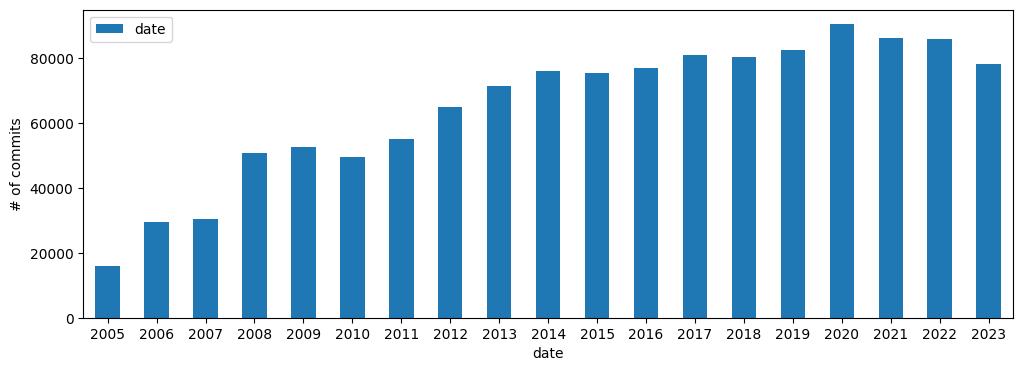

In [27]:
fig, axs = plt.subplots(figsize=(12, 4))
df_mean_years = df.groupby(df["date"].dt.year).count()
df_mean_years.plot(kind='bar', rot=0, ax=axs)
plt.ylabel("# of commits"); 